In [47]:
# regular EDA ans plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make the plots appear inside the notebook
# %matplotlib inline


# to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# models
# logistic regression
from sklearn.linear_model import LogisticRegression
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier


## Load data

In [48]:
# Loading the dataset
train_data = pd.read_csv('../data/train.csv')

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [51]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA
Some common steps for exploratory data analysis
1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

### Variable Definitions

| Variable | Definition                                   | Key                                        |
| :------- | :------------------------------------------- | :----------------------------------------- |
| `survival` | Survival                                     | `0` = No, `1` = Yes                        |
| `pclass`   | Ticket class                                 | `1` = 1st, `2` = 2nd, `3` = 3rd            |
| `sex`      | Sex                                          |                                            |
| `Age`      | Age in years                                 |                                            |
| `sibsp`    | # of siblings / spouses aboard the Titanic   |                                            |
| `parch`    | # of parents / children aboard the Titanic   |                                            |
| `ticket`   | Ticket number                                |                                            |
| `fare`     | Passenger fare                               |                                            |
| `cabin`    | Cabin number                                 |                                            |
| `embarked` | Port of Embarkation                          | `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton |

---

In [52]:
## Check the value counts of each class
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [53]:
# Check our data
train_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
# Check for missing values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# missing values percentage
print((train_data.isnull().mean() * 100).round(2).astype(str) + " %")

PassengerId      0.0 %
Survived         0.0 %
Pclass           0.0 %
Name             0.0 %
Sex              0.0 %
Age            19.87 %
SibSp            0.0 %
Parch            0.0 %
Ticket           0.0 %
Fare             0.0 %
Cabin           77.1 %
Embarked        0.22 %
dtype: object


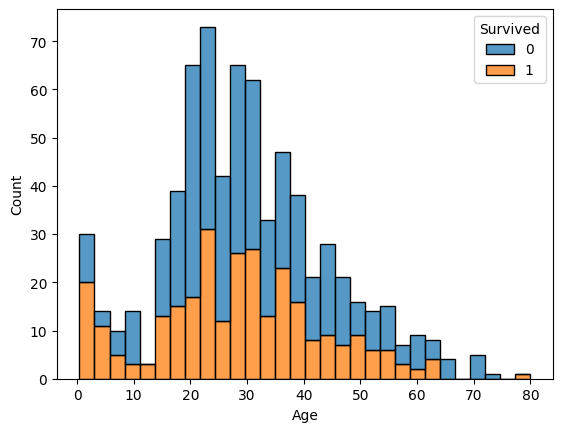

In [56]:
# we see age has 177 missing values, which is 19.87% of total rows
# do we even need the Age column?
# let's check survival by age
sns.histplot(data = train_data,
             x = 'Age',
             hue = 'Survived',
             multiple = 'stack',
             bins = 30);

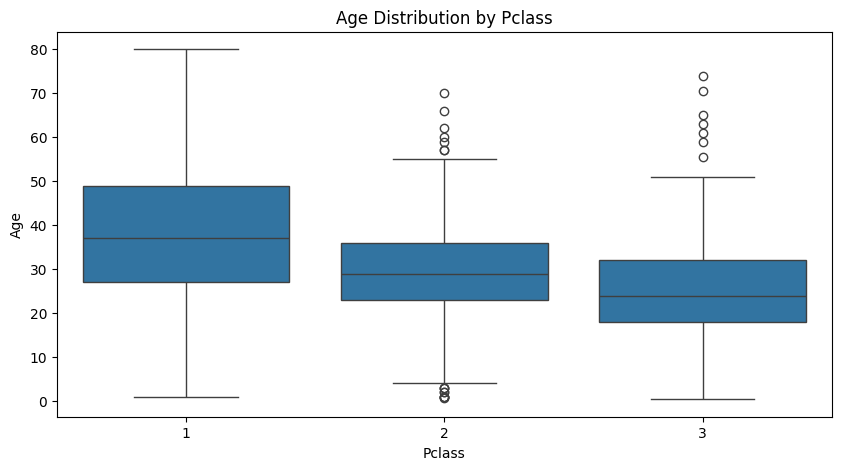

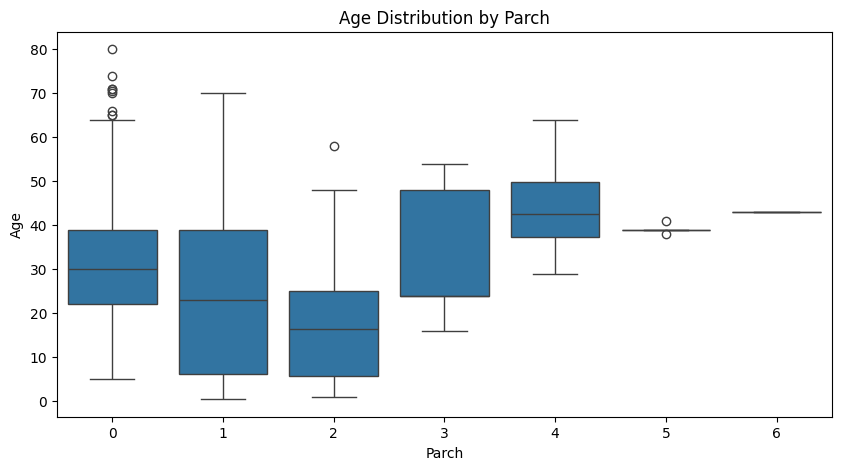

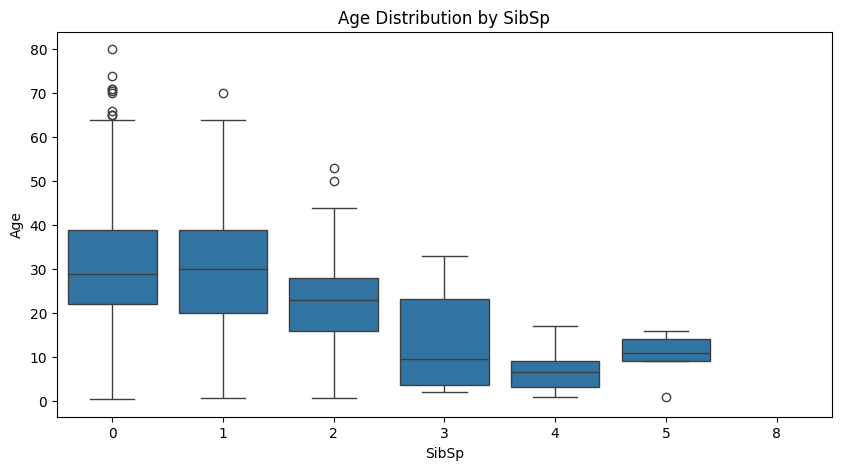

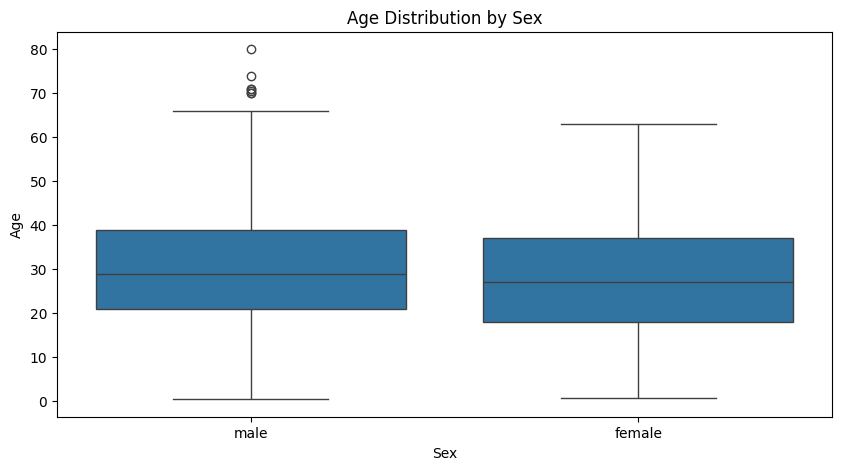

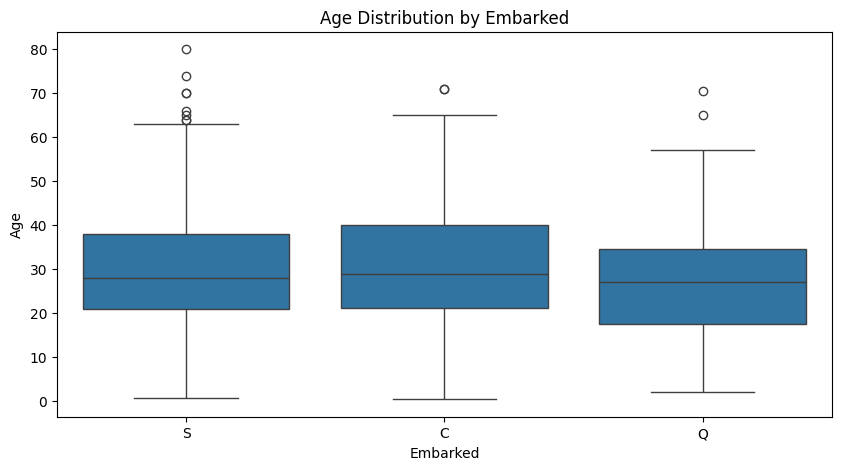

In [57]:
# we see that between 0 and 10 years, most of the passengers survived
# so the Age column is important
# so, what do we do with the missing values?
# we can fill the missing values with the median age
# but doing so might oversimplify and reduce the variance
# so, we will do imputation based on the median age of other columns which are related to the Age column
# let's check which columns are related to the Age column

# we will check the Age distribution by Pclass, Parch, SibSp, Sex and Embarked
cols = ['Pclass', 'Parch', 'SibSp', 'Sex', 'Embarked']

for col in train_data[cols]:
    plt.figure(figsize=(10, 5));
    sns.boxplot(x=col, y='Age', data=train_data);
    plt.title(f'Age Distribution by {col}');
    plt.show();

In [58]:
# we see that Age column is related to Pclass, Parch, SibSp
# we will group by Pclass, SibSp, Parch and get the median age for each group
# then we will fill the missing values in the Age column with the median age of the corresponding group

grouped_median = train_data.groupby(['Pclass', 'SibSp', 'Parch'])['Age'].median()
grouped_median.tail()

Pclass  SibSp  Parch
3       3      2         6.5
        4      1         7.0
               2         6.0
        5      2        11.0
        8      2         NaN
Name: Age, dtype: float64

In [59]:
# we see that there is one group with no median age, which is Pclass 3, SibSp 8, Parch 2
# it means that there is no passenger with this combination
# we can fill the missing values with the overall median age
overall_median_age = train_data['Age'].median()

# fill the missing values with the median age of each group
def fill_missing_age(row):
    if pd.isnull(row['Age']):
        key = (row['Pclass'], row['SibSp'], row['Parch'])
        if key in grouped_median.index:
            return grouped_median.loc[key]
        else:
            return overall_median_age
    return row['Age']


In [60]:
# apply the function to fill the missing values
train_data['Age'] = train_data.apply(fill_missing_age, axis=1)

In [61]:
# let's check if there are any missing values left
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              7
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
# we replace the missing values in the Age column with overall median age
train_data['Age'] = train_data['Age'].fillna(overall_median_age)

In [63]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Finding patterns

In [64]:
# Survival frequency according to sex
train_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [65]:
# Compare Survived column with Sex column
pd.crosstab(train_data.Survived, train_data.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


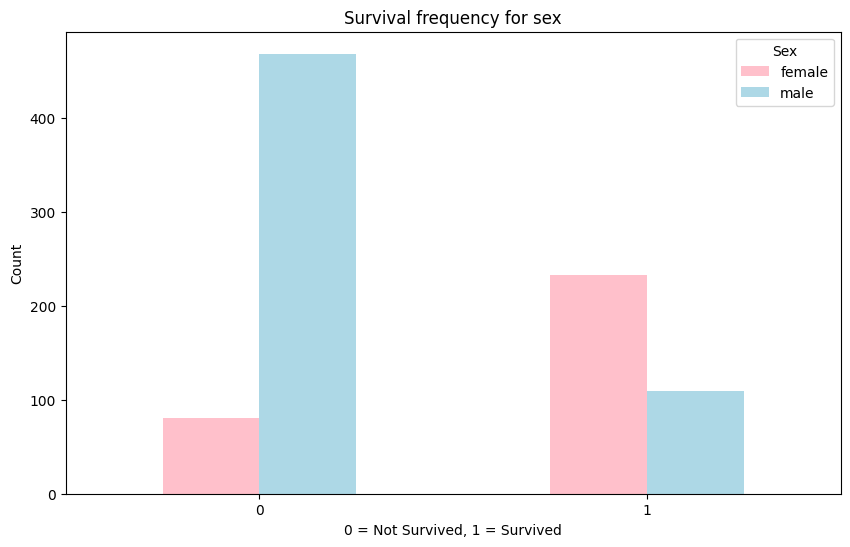

In [66]:
# Create a plot of crosstab
pd.crosstab(train_data.Survived, train_data.Sex).plot(kind="bar",
                                                      figsize=(10, 6),
                                                      color=["pink", "lightblue"]);

plt.title("Survival frequency for sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [67]:
# survival frequency according to Pclass
train_data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [68]:
# compare pclass to survived
pd.crosstab(train_data.Survived, train_data.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


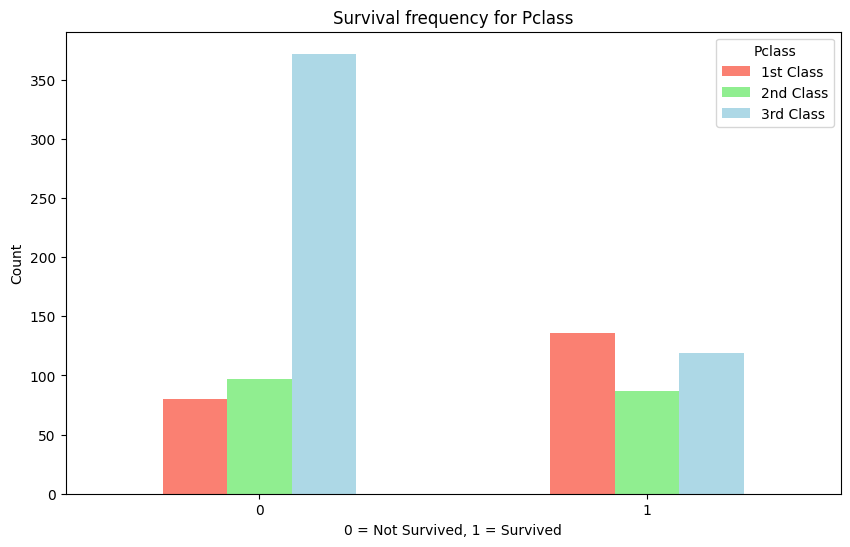

In [69]:
pd.crosstab(train_data.Survived, train_data.Pclass).plot(kind="bar",
                                                         figsize=(10, 6),
                                                         color=["salmon", "lightgreen", "lightblue"]);
plt.title("Survival frequency for Pclass")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.legend(title="Pclass", labels=["1st Class", "2nd Class", "3rd Class"])
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [70]:
# there are 2 missing values in the Embarked column
# we can fill the missing values with the most common value
# let's check the value counts of the Embarked column
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [71]:
# fill the missing values with the most common value
train_data['Embarked'] = train_data['Embarked'].fillna('S')

### Make a correlation matrix with the numeric columns

In [72]:
# first, convert the Sex column to numeric value (0 = Male, 1 = Female)
train_data['Sex'] = train_data['Sex'].str.lower().map({'male': 0, 'female': 1})

# then, convert the Embarked column to numeric value (0 = C, 1 = Q, 2 = S)
train_data['Embarked'] = train_data.Embarked.map({'C': 0, 'Q': 1, 'S': 2})

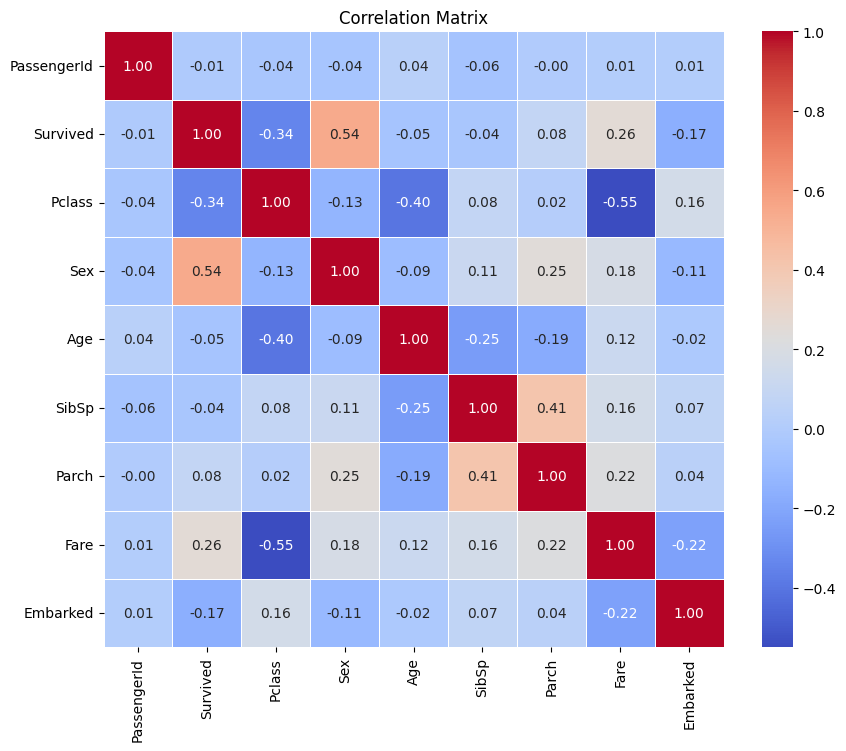

In [73]:
# now we can make a correlation matrix with numeric columns
# let's get the numeric columns
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()

# make a correlation matrix
correlation_matrix = train_data[numeric_cols].corr()

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5);
plt.title("Correlation Matrix")
plt.show()

In [74]:
# now we select the features we want to use for our model
# lets drop the columns that are not useful for our model
train_data = train_data.drop(["Ticket", "Cabin", "PassengerId", "Name"], axis=1)

## Modelling

In [75]:
# split the data into features and target variable
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

In [76]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2
887,1,1,19.0,0,0,30.0000,2
888,3,1,13.5,1,2,23.4500,2
889,1,0,26.0,0,0,30.0000,0


In [77]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [78]:
# let's split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will try 3 different models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [79]:
# put models in a dictionary
models = {"LogisticRegression": LogisticRegression(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}

# create a function to train and evaluate the models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    """
    Train and evaluate multiple models on the given training and testing data.
    Args:
        models (dict): A dictionary where keys are model names and values are model instances.
        X_train (DataFrame): Training features.
        y_train (Series): Training target variable.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing target variable.
    """
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        results[name] = score
        print(f"{name} Accuracy: {score:.4f}")
    return results

In [80]:
resuts = train_and_evaluate(models, X_train, y_train, X_test, y_test)

LogisticRegression Accuracy: 0.8101
KNeighborsClassifier Accuracy: 0.7207
RandomForestClassifier Accuracy: 0.8156


We see that, for the training dataset, RandomForestClassifier performs best without any hyperparameter tuning

## Submission

In [81]:
# Load the test dataset
test_data = pd.read_csv('../data/test.csv')

In [82]:
def prepare_submission(test_data_path='../data/test.csv'):
    test_data = pd.read_csv(test_data_path)
    
    # Store PassengerId for submission
    passenger_ids = test_data['PassengerId'].copy()
    
    # Apply the same preprocessing steps as training data
    
    # 1. Handle missing Age values using grouped median
    grouped_median = train_data.groupby(['Pclass', 'SibSp', 'Parch'])['Age'].median()
    overall_median_age = train_data['Age'].median()
    
    def fill_missing_age(row):
        if pd.isnull(row['Age']):
            key = (row['Pclass'], row['SibSp'], row['Parch'])
            if key in grouped_median.index:
                return grouped_median.loc[key]
            else:
                return overall_median_age
        return row['Age']
    
    test_data['Age'] = test_data.apply(fill_missing_age, axis=1)
    test_data['Age'] = test_data['Age'].fillna(overall_median_age)
    
    # 2. Handle missing Embarked values (fill with most common value 'S')
    test_data['Embarked'] = test_data['Embarked'].fillna('S')
    
    # 3. Convert categorical variables to numeric
    test_data['Sex'] = test_data['Sex'].str.lower().map({'male': 0, 'female': 1})
    test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    
    # 4. Drop unnecessary columns (same as training data)
    test_data_processed = test_data.drop(["Ticket", "Cabin", "PassengerId", "Name"], axis=1)
    
    # 5. Train the model on full training data
    X_full = train_data.drop(columns=['Survived'])
    y_full = train_data['Survived']
    
    # Select and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_full, y_full)
    
    # 6. Make predictions
    predictions = model.predict(test_data_processed)
    
    # 7. Create submission dataframe
    submission = pd.DataFrame({
        'PassengerId': passenger_ids,
        'Survived': predictions
    })
    
    return submission

# Create submission using the best performing model
submission_df = prepare_submission()

# Display first few rows
print("Submission Preview:")
print(submission_df.head(10))

# Save to CSV for Kaggle submission
submission_df.to_csv('titanic_submission_01.csv', index=False)
print(f"\nSubmission saved to 'titanic_submission_01.csv'")
print(f"Total predictions: {len(submission_df)}")

Submission Preview:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0

Submission saved to 'titanic_submission_01.csv'
Total predictions: 418
